In [1]:
import stan
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib
import matplotlib.pyplot as plt
import arviz as az
#matplotlib.rcParams['figure.figsize']=5,5
matplotlib.rcParams['figure.dpi']=100
#plt.style.use('ggplot')

### PDfs and histograms

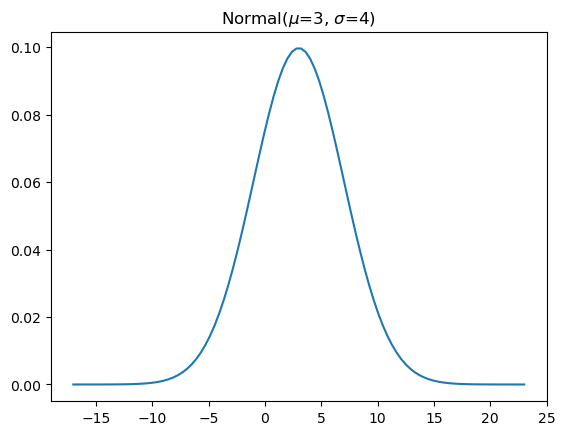

In [4]:
mu = 3
sigma = 4
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Normal($\mu$='+str(mu)+', $\sigma$='+str(sigma)+')')
plt.show()

$$N(x; \mu,\sigma) \propto e^{-(x-\mu)^2/\sigma^2}$$

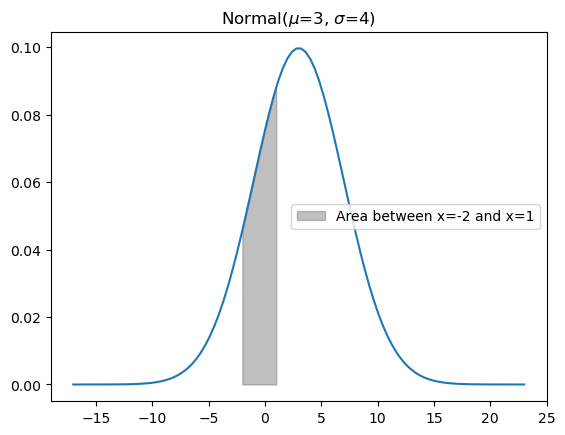

In [9]:
mu = 3
sigma = 4
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
x_fill = np.linspace(-2, 1, 100)
plt.fill_between(x_fill, stats.norm.pdf(x_fill, mu, sigma), color='gray', alpha=0.5, label='Area between x=-2 and x=1')
plt.title('Normal($\mu$='+str(mu)+', $\sigma$='+str(sigma)+')')
plt.legend()
plt.show()

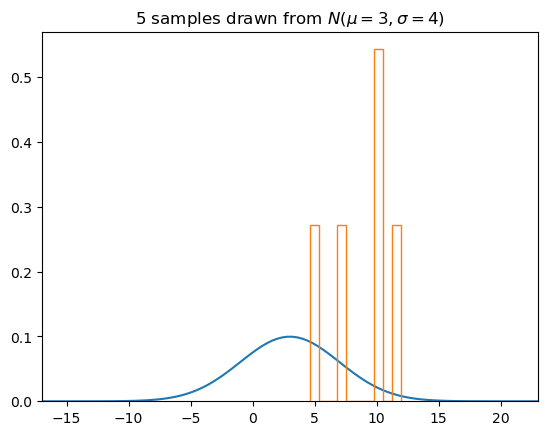

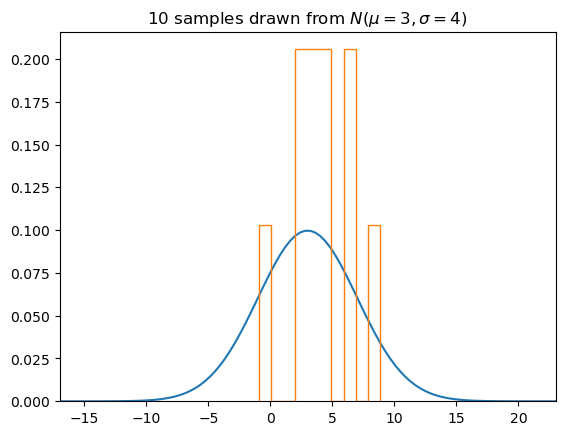

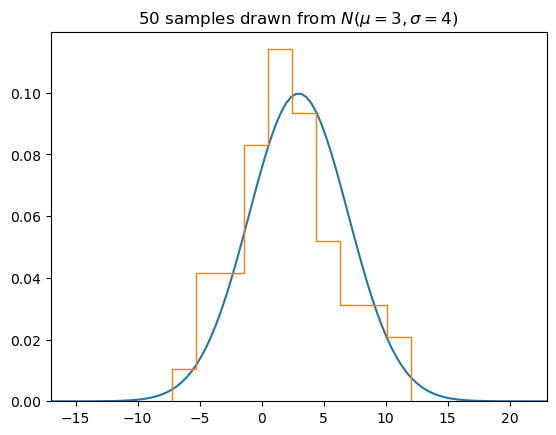

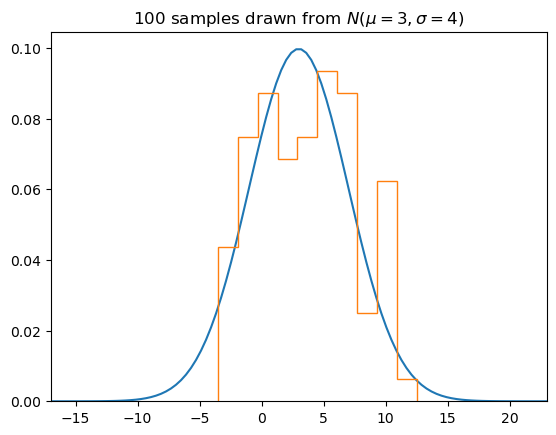

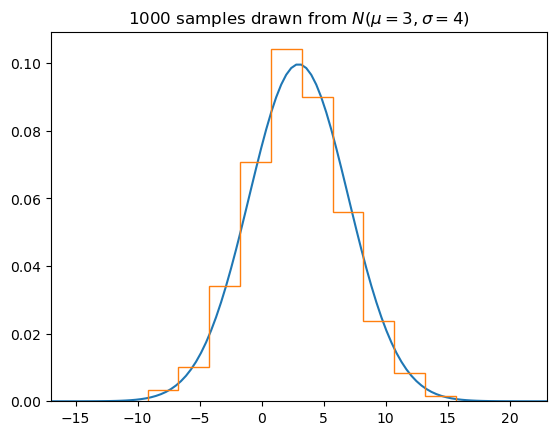

In [20]:
np.random.seed(0)
for N in [5,10,50,100,1000]:
    samples = np.random.normal(mu,sigma,N)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.hist(samples, density=1, histtype='step')
    plt.xlim(mu - 5*sigma, mu + 5*sigma)
    plt.title(str(N)+' samples drawn from $N(\mu=3,\sigma=4)$')
    plt.savefig('figs/normal-'+str(N)+'-samples.png')
    plt.show()
    

### PDF Examples

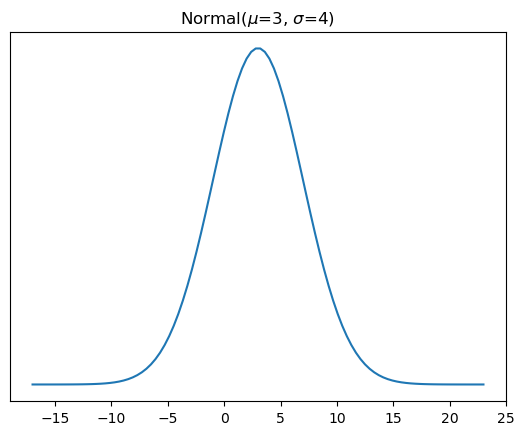

In [36]:
mu = 3
sigma = 4
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Normal($\mu$='+str(mu)+', $\sigma$='+str(sigma)+')')
plt.yticks([])
plt.savefig('figs/normal.png')
plt.show()

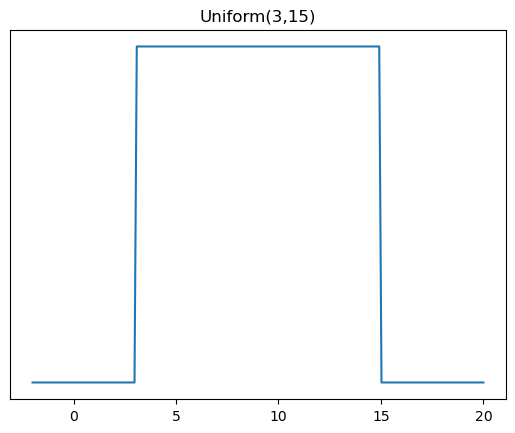

In [28]:
a = 3
b = 12
x = np.linspace(a-5, a+b+5,200)
plt.plot(x, stats.uniform.pdf(x, a, b))
plt.title('Uniform(3,15)')
plt.yticks([])
plt.savefig('figs/uniform.png')
plt.show()

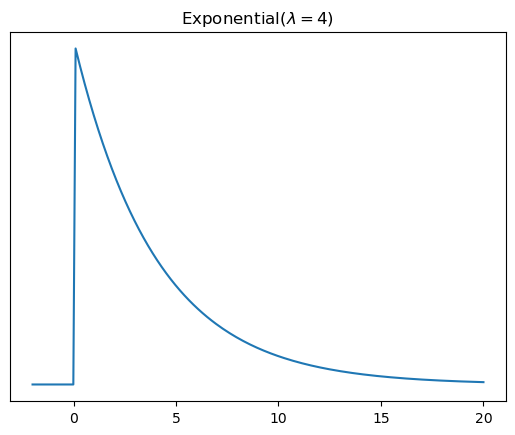

In [35]:
x = np.linspace(a-5, a+b+5,200)
plt.plot(x, stats.expon.pdf(x,0,4))
plt.title('Exponential($\lambda=4$)')
plt.yticks([])
plt.savefig('figs/exponential.png')
plt.show()

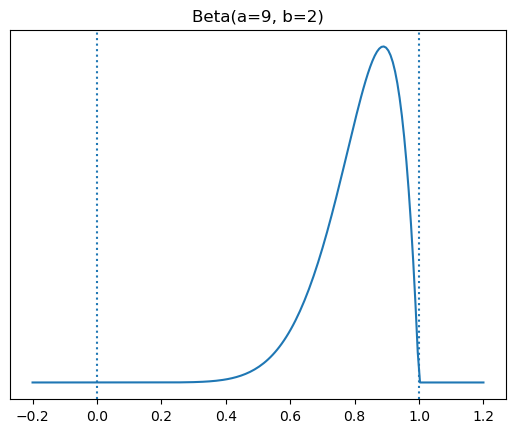

In [46]:
x = np.linspace(-0.2, 1.2,200)
plt.plot(x, stats.beta.pdf(x,9,2))
plt.title('Beta(a=9, b=2)')
plt.axvline(x=0, linestyle='dotted')
plt.axvline(x=1, linestyle='dotted')
plt.yticks([])
plt.savefig('figs/beta.png')
plt.show()

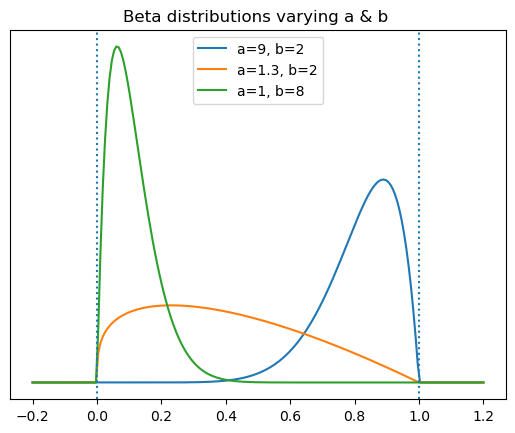

In [89]:
x = np.linspace(-0.2, 1.2,200)
plt.plot(x, stats.beta.pdf(x,9,2), label='a=9, b=2')
plt.plot(x, stats.beta.pdf(x,1.3,2), label='a=1.3, b=2')
plt.plot(x, stats.beta.pdf(x,2,16), label='a=1, b=8')
plt.title('Beta distributions varying a & b ')
plt.axvline(x=0, linestyle='dotted')
plt.axvline(x=1, linestyle='dotted')
plt.yticks([])
plt.legend()
plt.savefig('figs/beta-many.png')
plt.show()

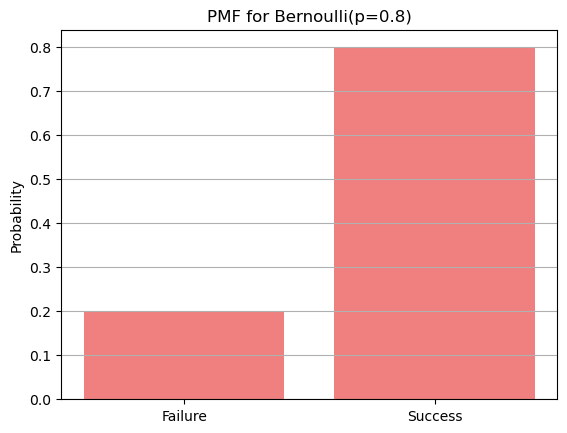

In [70]:
p = 0.8
x = [0, 1]
pmf_values = stats.bernoulli.pmf(x, p)

plt.bar(x, pmf_values, color='lightcoral', tick_label=['Failure', 'Success'])
#plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('PMF for Bernoulli(p=0.8)')
plt.grid(axis='y')
plt.savefig('figs/Bernoulli.png')
plt.show()

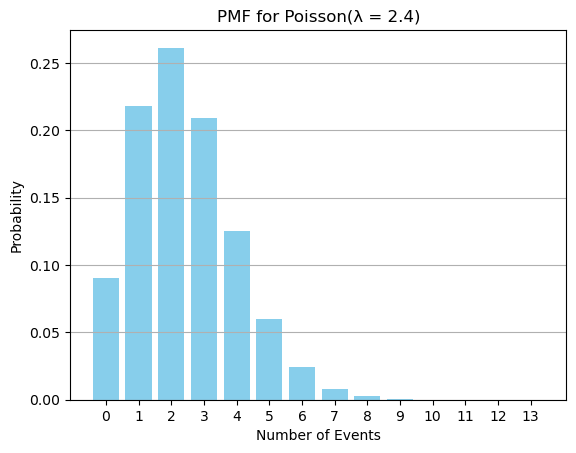

In [69]:
lambda_rate = 2.4
x = np.arange(0, 14)
pmf_values = stats.poisson.pmf(x, lambda_rate)

plt.bar(x, pmf_values, color='skyblue')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('PMF for Poisson(λ = 2.4)')
plt.grid(axis='y')
plt.xticks([n for n in range(14)])
plt.savefig('figs/Poisson.png')
plt.show()

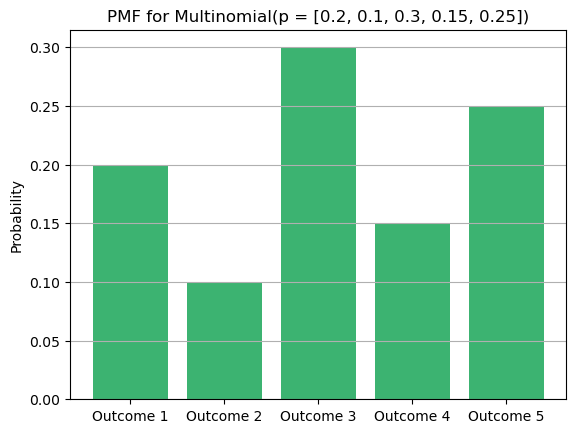

In [68]:
p = [0.2, 0.1, 0.3, 0.15, 0.25]
n = 1

x = np.eye(len(p), dtype=int)
pmf_values = stats.multinomial.pmf(x, n, p)

outcomes = [f'Outcome {i+1}' for i in range(len(p))]

plt.bar(outcomes, pmf_values, color='mediumseagreen')
#plt.xlabel('Outcomes')
plt.ylabel('Probability')
plt.title('PMF for Multinomial(p = [0.2, 0.1, 0.3, 0.15, 0.25])')
plt.grid(axis='y')
plt.savefig('figs/multinomial.png')
plt.show()

### Scratch

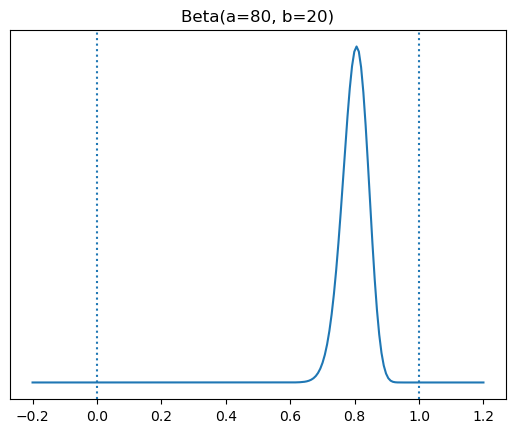

In [79]:
x = np.linspace(-0.2, 1.2,200)
plt.plot(x, stats.beta.pdf(x,80,20))
plt.title('Beta(a=80, b=20)')
plt.axvline(x=0, linestyle='dotted')
plt.axvline(x=1, linestyle='dotted')
plt.yticks([])
plt.savefig('figs/beta3.png')
plt.show()

### Conditional Probabilities

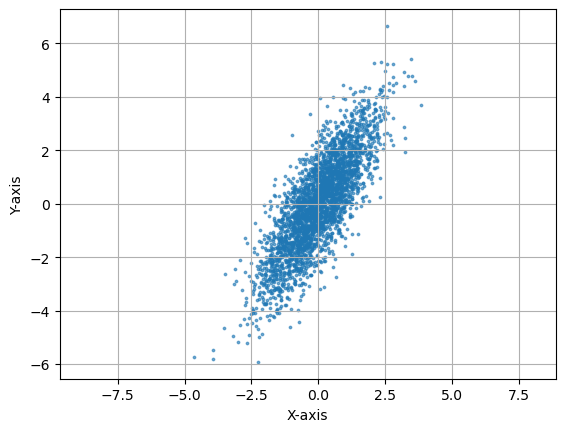

In [117]:
mean = [0, 0]
angle_deg = 30
angle_rad = np.deg2rad(angle_deg)
std_dev = 1

# Create 2D covariance matrix with specified angle
#cov_matrix = std_dev**2 * np.array([[np.cos(angle_rad)**2, np.cos(angle_rad)*np.sin(angle_rad)], [np.cos(angle_rad)*np.sin(angle_rad), np.sin(angle_rad)**2]])
cov_matrix = np.array([[1.15     , 1.5], [1.5, 3.05     ]])
# Generate correlated 2D normal data
data = np.random.multivariate_normal([0,0], cov_matrix, 3000)

# Plot scatter
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, s=3)
#plt.title(f'Scatter Plot with 30 Degree Angle')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid(True)
plt.show()

TypeError: list indices must be integers or slices, not tuple

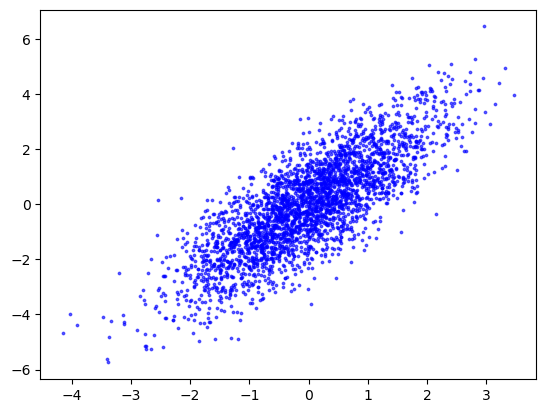

In [120]:
mean = [0, 0]
angle_deg = 30
angle_rad = np.deg2rad(angle_deg)
std_dev = 1

# Create 2D covariance matrix with specified angle
#cov_matrix = std_dev**2 * np.array([[np.cos(angle_rad)**2, np.cos(angle_rad)*np.sin(angle_rad)], [np.cos(angle_rad)*np.sin(angle_rad), np.sin(angle_rad)**2]])
cov_matrix = np.array([[1.15     , 1.5], [1.5, 3.05     ]])
# Generate correlated 2D normal data
data = np.random.multivariate_normal([0,0], cov_matrix, 3000)

data0 = [x for x in data if x[0]<2.2]


# Plot scatter
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, s=3, color = 'blue')
plt.scatter(data0[:, 0], data0[:, 1], alpha=0.6, s=3, color='red')
#plt.title(f'Scatter Plot with 30 Degree Angle')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid(True)
plt.show()

### Sample parameters of a PDf and then from the PDF

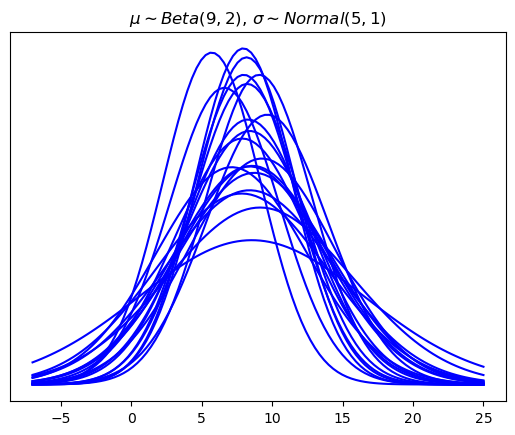

In [158]:
data = []
x = np.linspace(-7,25, 100)
np.random.seed(1)
for n in range(20):
    data.append(list(np.random.normal(mu,sigma,100)))
    mu = 10*np.random.beta(9,2,1)[0]
    sigma = abs(np.random.normal(5,1,1)[0])    
    plt.plot(x, stats.norm.pdf(x, mu, sigma), '-b')
plt.yticks([])
plt.title('$\mu \sim Beta(9,2)$, $\sigma\sim Normal(5,1)$')
plt.savefig('figs/many-normals.png')
plt.show()

In [168]:
data2 = [item for sublist in data for item in sublist ]

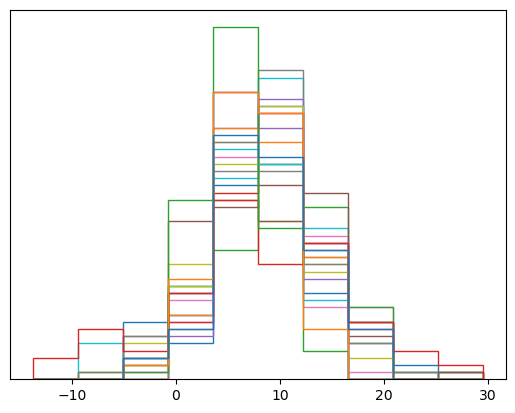

In [172]:
plt.hist(data,histtype='step',density=1)
plt.yticks([])
plt.show()

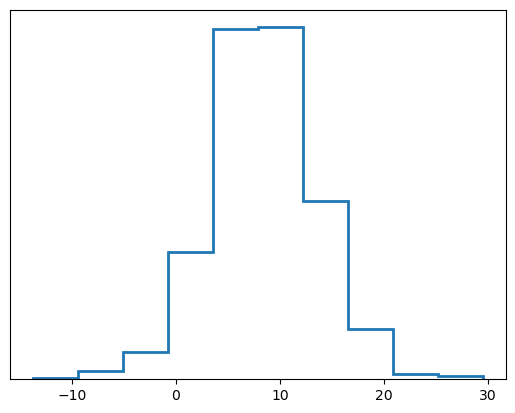

In [174]:
plt.hist(data2,histtype='step',density=1, linewidth=2)
plt.yticks([])
plt.show()

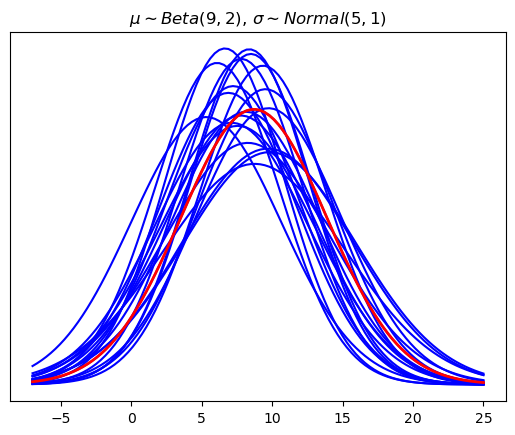

In [181]:
data3 = []
x = np.linspace(-7,25, 100)
np.random.seed(1)
for n in range(20):
    mu = 10*np.random.beta(9,2,1)[0]
    sigma = abs(np.random.normal(5,1,1)[0])    
    plt.plot(x, stats.norm.pdf(x, mu, sigma), '-b')
plt.plot(x, stats.norm.pdf(x, mu, sigma), '-r', linewidth=2)
data3.append(list(np.random.normal(mu,sigma,200)))
plt.yticks([])
plt.title('$\mu \sim Beta(9,2)$, $\sigma\sim Normal(5,1)$')
plt.savefig('figs/many-normals-true.png')
plt.show()

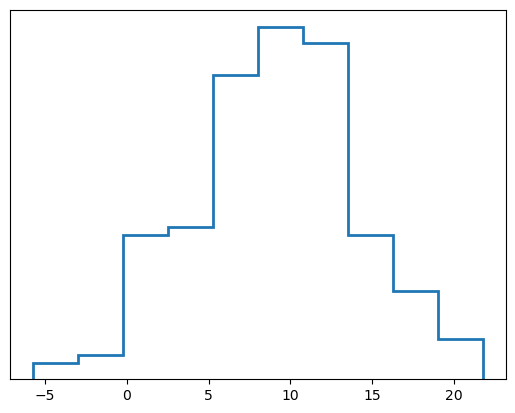

In [182]:
plt.hist(data3,histtype='step',density=1, linewidth=2)
plt.yticks([])
plt.show()

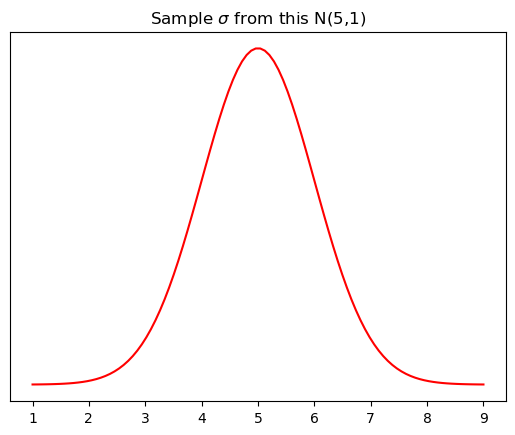

In [150]:
x = np.linspace(1,9, 100)
plt.plot(x, stats.norm.pdf(x, 5, 1), '-r')
plt.yticks([])
plt.title('Sample $\sigma$ from this N(5,1)')
plt.savefig('figs/sigma-normals.png')
plt.show()

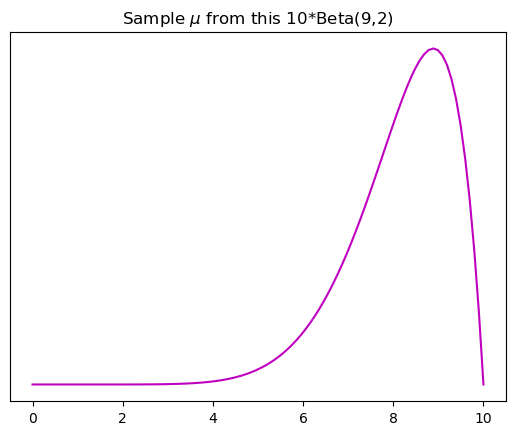

In [154]:
x = np.linspace(0,10, 100)
plt.plot(x, stats.beta.pdf(x/10, 9, 2), '-m')
plt.yticks([])
plt.title('Sample $\mu$ from this 10*Beta(9,2)')
plt.savefig('figs/mu-beta.png')
plt.show()